In [1]:
import sys
sys.path.append("../")
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

from sehec.envs.arenas.simple2d import Simple2D
from sehec.models.TEM.model import TEM

c:\Users\Coursework\.conda\envs\TEM\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\Coursework\.conda\envs\TEM\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\Coursework\.conda\envs\TEM\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\Coursework\.conda\envs\TEM\lib\site-packages\tensorflow\python\f

Transition matrix: 
[[0.33333333 0.33333333 0.33333333 0.        ]
 [0.33333333 0.33333333 0.         0.33333333]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.         0.33333333 0.33333333 0.33333333]]
n_states:  4
First sensory observation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


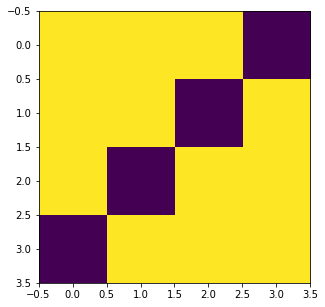

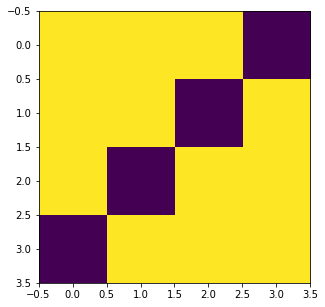

In [2]:
env_name = "env_example"
time_step_size = 1
agent_step_size = 0.2
room_width = 2
room_depth = 2

# Initialise Environment
env = Simple2D(environment_name=env_name,
                room_width=room_width,
                room_depth=room_depth,
                time_step_size=time_step_size,
                agent_step_size=agent_step_size)

discount = .9
threshold = 1e-6
lr_td = 1e-2
t_episode = 25
n_episode = 1
state_density = 1
twoDvalue=True

agent = TEM(discount=discount, t_episode=t_episode, n_episode=n_episode, threshold=threshold, lr_td=lr_td,
            room_width=env.room_width, room_depth=env.room_depth, state_density=state_density, twoD=twoDvalue)

100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

[0 0]


<AxesSubplot:>

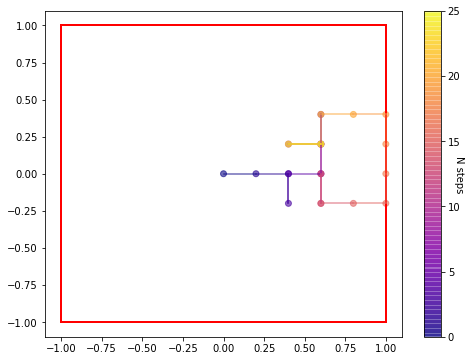

In [3]:
total_iters = 0
obs, state = env.reset()
obs = obs[:2]
xs = []
# actions = [[-1,0], [0,1], [-1,0], [0,1], [-1,0]]

for i in tqdm(range(n_episode)):
    for j in range(t_episode):
        action, x, x_, x_two_hot = agent.act(obs)
        # action = actions[j]
        obs, state, reward = env.step(action)
        obs = obs[:2]
        xs.append(x)
        total_iters += 1

        print("x, x_, x_two_hot: ", x, x_, x_two_hot)

env.plot_trajectory()